In [264]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from scipy.stats import linregress
from scipy.integrate import trapz

%cd ./07_data

[Errno 2] No such file or directory: './07_data'
/Users/darioliotta/Documents/Physics of Data/Laboratory of Computational Physics/Exercises/07_data


1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


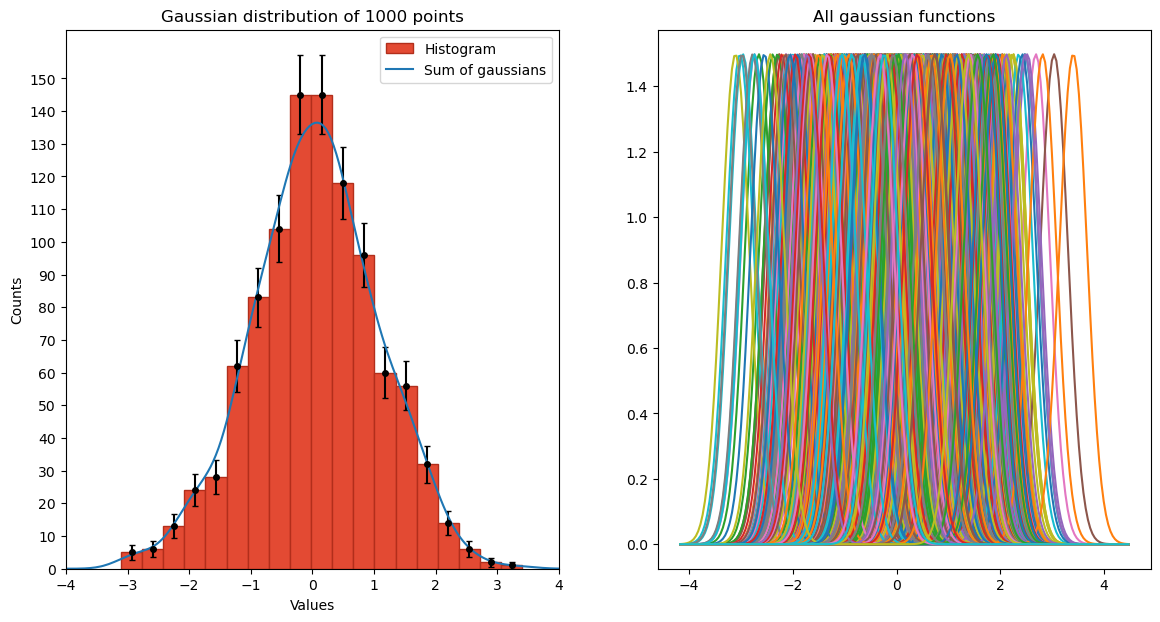

In [200]:
N = 1000
mean = 0.0
std = 1.0

#Filling array
x = np.random.normal(loc = mean, scale = std, size = N)

#Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(14,7))

#By Rice rule:
n_bins = int(2 * (N ** (1/3)))

ax[0].set_title(f'Gaussian distribution of {N} points')  #Setting title
ax[0].set_xlabel('Values')                               #Setting x axis title
ax[0].set_ylabel('Counts')                               #Setting y axis title
ax[0].set_xlim(mean - (4 * std), mean + (4 * std))       #Fixing four sigmas as interval

#Getting histogram
hist = ax[0].hist(x, bins = n_bins, color='#e34a33', edgecolor='#b22e1b', label = 'Histogram')

#Remember that:
#hist[0] contains the number of counts in each bin
#hist[1] contains the bin's edges

#Setting a 10-step scale for y axis
ax[0].set_yticks(np.arange(0, max(hist[0]) + 10, 10))

#((hist[1][1:] + hist[1][:-1]) / 2) returns the midpoint of each bin
ax[0].errorbar((hist[1][1:] + hist[1][:-1]) / 2, hist[0], np.sqrt(hist[0]), fmt = 'o', markersize = 4, color = 'black', ecolor = 'black', capsize = 2)

#Creating gaussians

#Evaluating the new standard deviation as given by the exercise assignment
std_value = 1.06 * std * (N ** (-1/5))

#Setting title for the gaussians plot
ax[1].set_title('All gaussian functions')

#Creating the x axis as an array for the gaussians
resolution = 200
x_axis = np.linspace(x.min()-(4*std_value), x.max()+(4*std_value), resolution)   #Fixing four sigmas as interval just as before

#Inizializing the sum
gaussians_sum = np.zeros(resolution)

for value in x:
    gaussian = norm.pdf(x_axis, loc = value, scale = std_value)   #Creates gaussian
    ax[1].plot(x_axis, gaussian)                                  #Plots
    gaussians_sum += gaussian                                     #Sums
    
#Evaluating the integral of the original histogram and the integral of the gaussian sum
original_int = trapz(hist[0], (hist[1][1:] + hist[1][:-1]) / 2)
sum_int = trapz(gaussians_sum, x_axis)

#Normalizing the gaussian sum as required
norm_gaussian = gaussians_sum * (original_int / sum_int)

#Plotting the normalized gaussian in the first subplot
ax[0].plot(x_axis, norm_gaussian, label = 'Sum of gaussians')
    
ax[0].legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2023-12-06 16:36:42--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2023-12-06 16:36:43--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc733d48400ae3706963e5cf336d.dl.dropboxusercontent.com/cd/0/inline/CI7LckjQ2MtqYyR1hXzszdzhdnVxOiO-7h83pDQfLdqhRSI9zmkvCUsxneQ8DqiNuo2j256QsTfRugnSq6Ql_y4oYetjisTqtCsILzAMPccbJQxDIsGtX6DV7MD_dgqieWU/file# [segue]
--2023-12-06 16:36:43--  https://uc733d48400ae3706963e5cf336d.dl.dropboxusercontent.com/cd/0/inline/CI7LckjQ2MtqYyR1hXzszdzhdnVxOiO-7h83pDQfLdqhRSI9zmkvCUsxneQ8DqiNuo

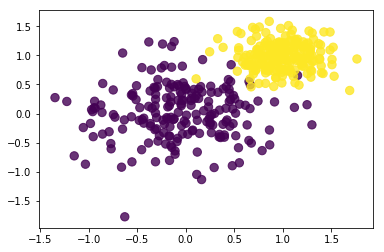

In [202]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

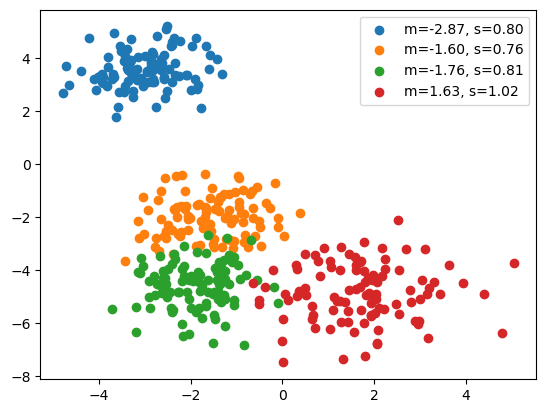

In [237]:
#Fixing parameters
mean_limit = 5.0    #Mean limit value
std_min = 0.5       #Standard deviation minimum value
std_max = 1.5       #Standard deviation maximum value
too_close = 0.4     #Minimum distance between two mean values
points = 100        #Half of the points of one gaussian distribution

#Choosing number of categories
categories = int(input('How many categories do you want? '))

#Inizializing lists
x_means = []
y_means = []
stds = []

for i in range(categories):
    #Getting values
    x_mean = random.uniform(-mean_limit,mean_limit)
    y_mean = random.uniform(-mean_limit,mean_limit)
    std = random.uniform(std_min, std_max)
    
    if i>0:   #We need to do the closeness-check only if one set of values has already been saved in the lists
        for j in range(i):
            if abs(x_means[j] - x_mean)<too_close and abs(y_means[j] - y_mean)<too_close:  #If the mean values are too close...
                i -= 1                                                                     #...we discard these values, so we go one step behind...
                break                                                                      #...and break the cycle
            
        if j == i-1:                 #If the cycle has not been broken, the values are ok and we can save them
            x_means.append(x_mean)
            y_means.append(y_mean)
            stds.append(std)
            
    else:                            #Saving the first set of values
        x_means.append(x_mean)
        y_means.append(y_mean)
        stds.append(std)
        
for xm, ym, s in zip(x_means, y_means, stds):
    x = np.random.normal(xm, s, points)
    y = np.random.normal(ym, s, points)
    plt.scatter(x, y, label = f'm={xm:.2f}, s={s:.2f}')
    
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [246]:
data = np.load('residuals_261.npy', allow_pickle=True)
data = pd.DataFrame(data.item())
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


The two features are 'residuals' and 'distances'

In [256]:
#Cleaning the sample
data = data[data['residuals'].abs() < 2.0]
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [262]:
#Performe the linear regress 'residuals' versus 'distances'
linear_regression = linregress(data['residuals'], data['distances'])
print('Slope:', linear_regression.slope)
print('Intercept:', linear_regression.intercept)
print('R value:', linear_regression.rvalue)
print('P value:', linear_regression.pvalue)
print('Standard error of the slope', linear_regression.stderr)
print('Standard error of the intercept', linear_regression.intercept_stderr)

Slope: 0.5779133666359257
Intercept: 10.025258299436526
R value: 0.04340351052255908
P value: 8.717037183576464e-06
Standard error of the slope 0.12989809632256547
Standard error of the intercept 0.05919737176060824


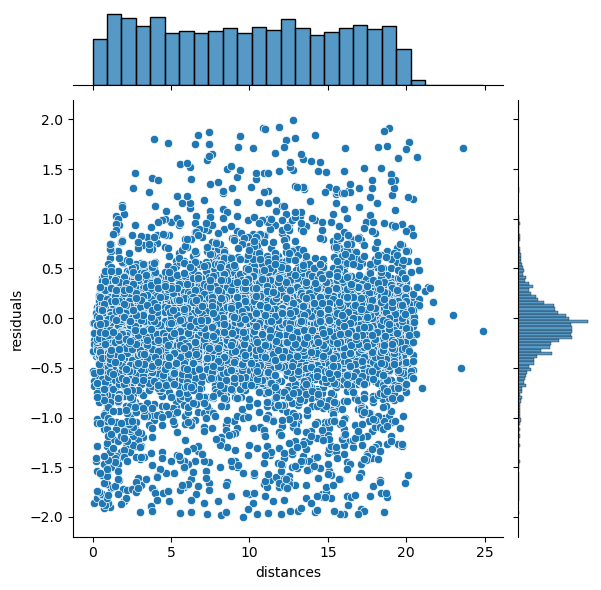

In [277]:
sns.jointplot(x = "distances", y = "residuals", data = data)